# WeatherPy

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/output_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [86]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

## Perform API Calls
- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name)

In [87]:
# Set up URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Set Unit Measurement
units = "imperial"

# Query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Test API Call
response = requests.get(query_url + "New York")
city_data = response.json()
city_data

{'coord': {'lon': -74.006, 'lat': 40.7143},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 42.8,
  'feels_like': 30.16,
  'temp_min': 41,
  'temp_max': 44.6,
  'pressure': 1019,
  'humidity': 42},
 'visibility': 10000,
 'wind': {'speed': 13.8, 'deg': 260},
 'clouds': {'all': 1},
 'dt': 1612649683,
 'sys': {'type': 1,
  'id': 4610,
  'country': 'US',
  'sunrise': 1612612839,
  'sunset': 1612649978},
 'timezone': -18000,
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

In [88]:
# Create empty lists for data
name = []
lat = []
lon = []
maxtemp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Print header from starter file
print("Beginning Data Retrieval")
print("----------------------------")

# Create Loop
i = 0 
for city in cities:
    api_data = requests.get(query_url + city).json()
    i = i + 1
    try:
        name.append(api_data["name"])
        lat.append(api_data["coord"]["lat"])
        lon.append (api_data["coord"]["lon"])
        maxtemp.append(api_data["main"]["temp_max"])
        humidity.append(api_data["main"]["humidity"])
        cloudiness.append(api_data["clouds"]["all"])
        wind_speed.append(api_data["wind"]["speed"])
        country.append(api_data["sys"]["country"])
        date.append(api_data["dt"])
        
        #weather_data.append([city, lat, lon, maxtemp, humidity, cloudiness, wind_speed, country, date])
        print(f"Processing Record {i} | {city}")
        #time.sleep(.1)
        
    except:
        print(f"City '{city}' not found. Skipping...")
        

# Print footer from starter file after loop complete
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 | tazovskiy
Processing Record 2 | galesong
Processing Record 3 | leningradskiy
Processing Record 4 | shingu
Processing Record 5 | padang
Processing Record 6 | ikom
Processing Record 7 | albany
Processing Record 8 | saurimo
Processing Record 9 | tianpeng
Processing Record 10 | new norfolk
Processing Record 11 | apache junction
City 'karakose' not found. Skipping...
Processing Record 13 | cape town
Processing Record 14 | severo-kurilsk
Processing Record 15 | chuy
Processing Record 16 | punta arenas
Processing Record 17 | vaini
Processing Record 18 | suna
Processing Record 19 | bredasdorp
Processing Record 20 | petropavlovsk-kamchatskiy
Processing Record 21 | sao filipe
Processing Record 22 | tuktoyaktuk
Processing Record 23 | puerto ayora
Processing Record 24 | fairbanks
City 'sentyabrskiy' not found. Skipping...
Processing Record 26 | preobrazheniye
Processing Record 27 | faanui
Processing Record 28 | meulaboh
Pro

Processing Record 244 | kudahuvadhoo
Processing Record 245 | vilcun
Processing Record 246 | takoradi
Processing Record 247 | yelabuga
Processing Record 248 | bardiyah
Processing Record 249 | jasper
Processing Record 250 | port hardy
City 'attawapiskat' not found. Skipping...
Processing Record 252 | camacha
Processing Record 253 | tuatapere
Processing Record 254 | hualmay
Processing Record 255 | huangzhai
Processing Record 256 | sumbe
Processing Record 257 | dikson
Processing Record 258 | zagarolo
Processing Record 259 | ust-kan
City 'grand river south east' not found. Skipping...
Processing Record 261 | marawi
City 'meyungs' not found. Skipping...
Processing Record 263 | luocheng
Processing Record 264 | seoul
Processing Record 265 | tezu
Processing Record 266 | krivosheino
Processing Record 267 | hami
Processing Record 268 | labuhan
Processing Record 269 | manggar
Processing Record 270 | scottsbluff
Processing Record 271 | kaniama
Processing Record 272 | jalali
Processing Record 273 | 

Processing Record 486 | beringovskiy
Processing Record 487 | antalaha
Processing Record 488 | mwense
Processing Record 489 | guerrero negro
Processing Record 490 | geraldton
Processing Record 491 | xining
Processing Record 492 | gigmoto
Processing Record 493 | ndjole
Processing Record 494 | ordu
Processing Record 495 | kankan
Processing Record 496 | myitkyina
Processing Record 497 | porosozero
City 'tidore' not found. Skipping...
Processing Record 499 | sept-iles
Processing Record 500 | zhigansk
Processing Record 501 | talaya
Processing Record 502 | farah
Processing Record 503 | koshurnikovo
Processing Record 504 | kukuna
Processing Record 505 | salalah
Processing Record 506 | novyy urgal
Processing Record 507 | tawang
Processing Record 508 | kyzyl-mazhalyk
Processing Record 509 | argelia
Processing Record 510 | sorland
Processing Record 511 | gimli
Processing Record 512 | keti bandar
Processing Record 513 | mtwara
Processing Record 514 | tadpatri
Processing Record 515 | inirida
Proces

## Convert Raw Data to DataFrame
- export the city data into .csv file
- display the DataFrame

In [89]:
# Create DataFrame
weather_df = pd.DataFrame({"City": city,
                           "Country": country,
                           "Date": date,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Max Temp (F)": maxtemp,
                           "Humidity (%)": humidity,
                           "Cloudiness (%)": cloudiness,
                           "Wind Speed (mph)": wind_speed,
                            })

weather_df.head()

#Save to CSV
weather_df.to_csv(output_data_file)

In [90]:
# Convert date/time stamp
clean_weather_df = pd.to_datetime(weather_df["Date"], unit = "s")
clean_weather_df

0     2021-02-06 22:24:47
1     2021-02-06 22:24:48
2     2021-02-06 22:24:48
3     2021-02-06 22:24:48
4     2021-02-06 22:24:48
              ...        
558   2021-02-06 22:27:46
559   2021-02-06 22:27:47
560   2021-02-06 22:27:47
561   2021-02-06 22:27:47
562   2021-02-06 22:27:48
Name: Date, Length: 563, dtype: datetime64[ns]

In [91]:
# Summary Stats
weather_df.describe()

,Date,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,5.630000e+02,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,1.612650e+09,21.213061,17.354012,48.689059,72.607460,51.877442,8.284654
std,7.887508e+01,33.145552,92.954587,32.812476,20.629862,39.626695,5.677768
min,1.612650e+09,-54.800000,-179.166700,-40.850000,1.000000,0.000000,0.110000
25%,1.612650e+09,-6.240400,-69.731350,26.600000,62.000000,7.500000,3.860000
50%,1.612650e+09,24.687700,25.086500,61.450000,78.000000,51.000000,6.910000
75%,1.612650e+09,50.150100,100.042700,75.255000,88.000000,92.000000,11.500000
max,1.612650e+09,78.218600,179.316700,95.000000,100.000000,100.000000,29.930000


In [95]:
#find cities that have humidity over 100%
#humidity_100 = weather_df.loc[weather_df["Humidity (%)"] > 100, :]
humidity_100 = weather_df["Humidity (%)"].max()
humidity_100

100

# Plotting the Data
- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

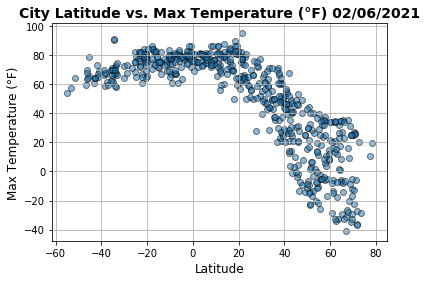

In [96]:
# Scatter Plot

plt.scatter(weather_df["Latitude"], weather_df["Max Temp (F)"], alpha=.5, edgecolors="black")
plt.title('City Latitude vs. Max Temperature (°F) 02/06/2021', fontsize=14, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (°F)', fontsize=12)
plt.grid()
plt.savefig('Output_Data/Images/lat_vs_temp.png')

 - There appears to be a correlation between global latitude and max temperature of a given location

# Latitude vs. Humidity Plot

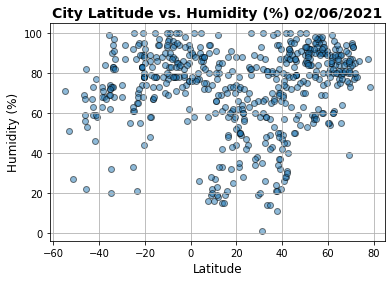

In [97]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], alpha=.5, edgecolors="black")
plt.title('City Latitude vs. Humidity (%) 02/06/2021', fontsize=14, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.grid()
plt.savefig('Output_Data/Images/lat_vs_humidity.png')

- There doesn't appear to be a correlation between latitude and humidity levels. Perhaps a small one in the northern hemisphere if you look at the latitude plots from 0 to 80 but we will find out in the next section.
- Humidity levels in general appear to be above 50% for the majority. Not nearly as many locations below.

## Latitude vs. Cloudiness Plot

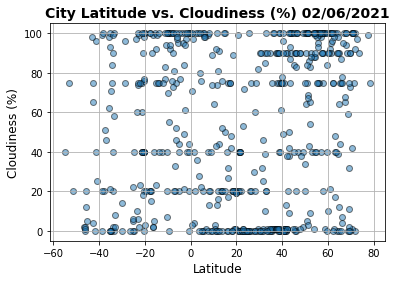

In [98]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], alpha=.5, edgecolors="black")
plt.title('City Latitude vs. Cloudiness (%) 02/06/2021', fontsize=14, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.grid()
plt.savefig('Output_Data/Images/lat_vs_cloud.png')

- Cloudiness appears to have even less of a correlation with latitude than humidity. But interestingly, at a glance there appears to be either 0 or 100% clouds and fewer in between at all degrees of latitude.

## Latitude vs. Wind Speed Plot

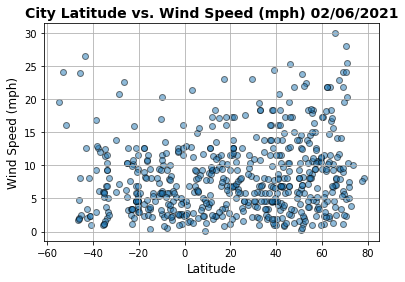

In [99]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"], alpha=.5, edgecolors="black")
plt.title('City Latitude vs. Wind Speed (mph) 02/06/2021', fontsize=14, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.grid()
plt.savefig('Output_Data/Images/lat_vs_wind.png')

- Similar to humidity and cloudiness, there seems to be little to no correlation between latitude and wind speed. 
- Wind speeds do appear to be relatively low this time of year.

# Linear Regression

In [100]:
# Define Northern and Southern Hemispheres
n_hemi = weather_df.loc[weather_df["Latitude"] >= 0]
s_hemi = weather_df.loc[weather_df["Latitude"] < 0]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation (r-value) between Northern Hemisphere Latitudes and Max Temperatures is -0.85


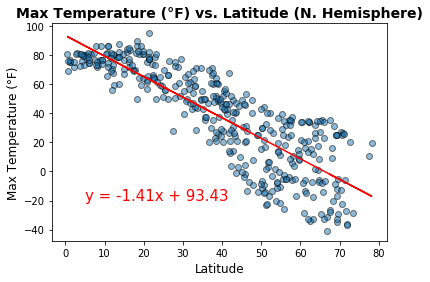

In [101]:
# Define x and y
x = n_hemi['Latitude']
y = n_hemi['Max Temp (F)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Northern Hemisphere Latitudes and Max Temperatures is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (°F)', fontsize=12)
plt.title('Max Temperature (°F) vs. Latitude (N. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/north_v_temp.png')
plt.show()


- As expected, there is a pretty strong negative correlation between latitude and max temperature. The farther away from the equator, the lower the max temp.

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation (r-value) between Southern Hemisphere Latitudes and Max Temperatures is 0.55


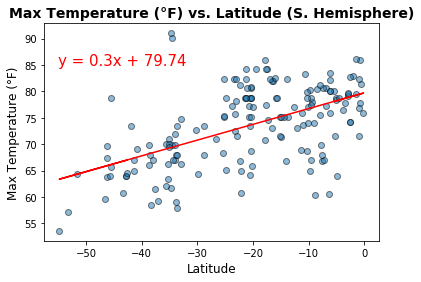

In [111]:
# Define x and y
x = s_hemi['Latitude']
y = s_hemi['Max Temp (F)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Southern Hemisphere Latitudes and Max Temperatures is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (°F)', fontsize=12)
plt.title('Max Temperature (°F) vs. Latitude (S. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/south_v_temp.png')
plt.show()


- Similar to the relationship between the Northern Hemisphere latitude, the Southern Hemisphere latitude is also correlated to max temperature - the farther away from the equator, the cooler the max temperature. Although according to this graph the relationship is not as strong as in the North.

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation (r-value) between Northern Hemisphere latitudes and humidity level is 0.33


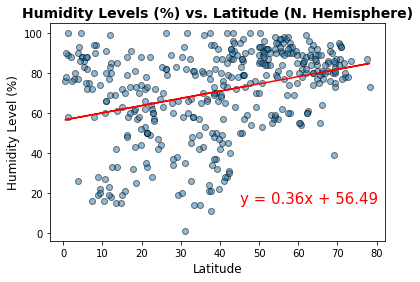

In [112]:
# Define x and y
x = n_hemi['Latitude']
y = n_hemi['Humidity (%)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Northern Hemisphere latitudes and humidity level is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity Level (%)', fontsize=12)
plt.title('Humidity Levels (%) vs. Latitude (N. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/north_v_humidity.png')
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation (r-value) between Southern Hemisphere latitudes and humidity level is 0.45


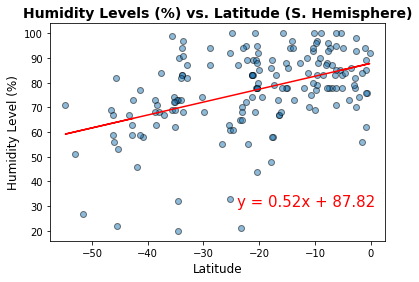

In [113]:
# Define x and y
x = s_hemi['Latitude']
y = s_hemi['Humidity (%)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Southern Hemisphere latitudes and humidity level is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-24,30),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity Level (%)', fontsize=12)
plt.title('Humidity Levels (%) vs. Latitude (S. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/south_v_humidity.png')
plt.show()

 - As predicted in the the earlier scatter plots, there appears to be a slight correlation between humidity and latitude but not a strong one and not one that would help very well for prediction purposes.

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation (r-value) between Northern Hemisphere latitudes and cloud percentage is 0.3


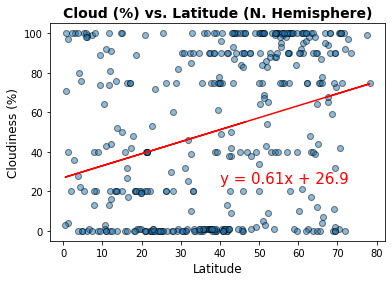

In [115]:
# Define x and y
x = n_hemi['Latitude']
y = n_hemi['Cloudiness (%)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Northern Hemisphere latitudes and cloud percentage is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(40,24),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.title('Cloud (%) vs. Latitude (N. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/north_v_cloud.png')
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation (r-value) between Southern Hemisphere latitudes and cloud percentage is 0.32


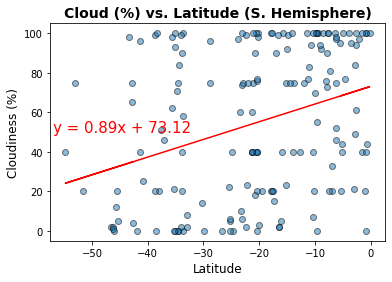

In [116]:
# Define x and y
x = s_hemi['Latitude']
y = s_hemi['Cloudiness (%)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Southern Hemisphere latitudes and cloud percentage is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-57,50),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.title('Cloud (%) vs. Latitude (S. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/south_v_cloud.png')
plt.show()

- Again, as previously observed, not a strong correlation between latitude in either hemisphere and cloudiness. It may be just my eyes deceiving me but it would be interesting to see where the majority of the data points lie as it appears to me that more often, it is either clear blue sky or complete overcast than partly cloudy this time of year.

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation (r-value) between Northern Hemisphere latitudes and wind speed is 0.16


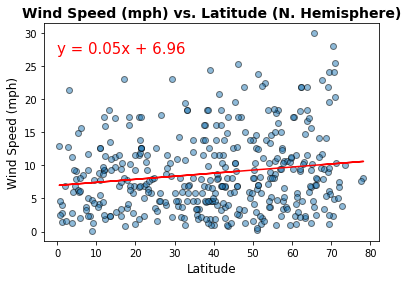

In [117]:
# Define x and y
x = n_hemi['Latitude']
y = n_hemi['Wind Speed (mph)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Northern Hemisphere latitudes and wind speed is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,27),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.title('Wind Speed (mph) vs. Latitude (N. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/north_v_wind.png')
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation (r-value) between Southern Hemisphere latitudes and wind speed is -0.18


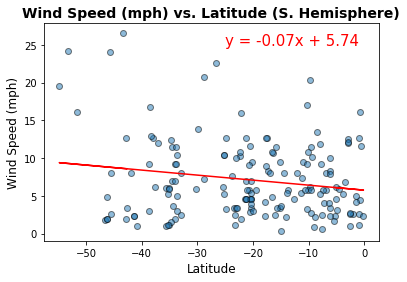

In [119]:
# Define x and y
x = s_hemi['Latitude']
y = s_hemi['Wind Speed (mph)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Southern Hemisphere latitudes and wind speed is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.title('Wind Speed (mph) vs. Latitude (S. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/south_v_wind.png')
plt.show()

- Almost no correlation between latitude and wind speed this time of year. I'm not sure if this is the same in other parts of the world but here this would make sense as it's not hurricane or peak tornado season.